In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import textwrap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer


In [2]:
df = pd.read_csv('country_level_data_0.csv')
df.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2.141361e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.030423e+11,51.8,6.7,4.4,11.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.347108e+10,51.4,4.5,4.8,15.21,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.319880e+09,31.2,8.2,2.6,11.60,35.1,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [3]:
df.isnull().sum()

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
gdp                                                                                       25
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 47
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                           

In [4]:
threshold = np.round(len(df)/2)
df = df.dropna(axis=1,thresh=threshold)
df.isnull().sum()

iso3c                                                                               0
region_id                                                                           0
country_name                                                                        1
income_id                                                                           0
gdp                                                                                25
composition_food_organic_waste_percent                                             41
composition_glass_percent                                                          46
composition_metal_percent                                                          47
composition_other_percent                                                          42
composition_paper_cardboard_percent                                                41
composition_plastic_percent                                                        42
other_information_information_system_for_solid_waste_m

In [5]:
df.shape

(217, 20)

In [6]:
numeric_col = df.select_dtypes(include=['number']).columns
len(numeric_col)

12

In [7]:
nonnumeric_col = df.select_dtypes(include=['object']).columns
len(nonnumeric_col)

8

In [8]:
df[nonnumeric_col].head()

,iso3c,region_id,country_name,income_id,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations
0,ABW,LCN,Aruba,HIC,NaN,Yes,Yes,Yes
1,AFG,SAS,Afghanistan,LIC,NaN,Yes,Yes,Yes
2,AGO,SSF,Angola,LMC,NaN,NaN,Yes,Yes
3,ALB,ECS,Albania,UMC,No,Yes,Yes,Yes
4,AND,ECS,Andorra,HIC,NaN,Yes,Yes,Yes


In [9]:
numeric_col

Index(['gdp', 'composition_food_organic_waste_percent',
       'composition_glass_percent', 'composition_metal_percent',
       'composition_other_percent', 'composition_paper_cardboard_percent',
       'composition_plastic_percent', 'population_population_number_of_people',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'total_msw_total_msw_generated_tons_year',
       'waste_treatment_recycling_percent'],
      dtype='object')

In [10]:
col_name1 =  {'gdp': 'GDP', 'composition_food_organic_waste_percent':'Organic', 'composition_glass_percent': 'Glass',
             'composition_metal_percent': 'Metal', 'composition_other_percent': 'Others', 
             'composition_paper_cardboard_percent': 'Paper/Carboard', 'composition_plastic_percent': 'Plastic',
             'population_population_number_of_people': 'Population', 'special_waste_e_waste_tons_year': 'Electronic tons',
             'special_waste_hazardous_waste_tons_year': 'Hazardous tons', 'total_msw_total_msw_generated_tons_year': 'Total MSW',
             'waste_treatment_recycling_percent': 'Treatment/Recycling'}
col_name1

{'gdp': 'GDP',
 'composition_food_organic_waste_percent': 'Organic',
 'composition_glass_percent': 'Glass',
 'composition_metal_percent': 'Metal',
 'composition_other_percent': 'Others',
 'composition_paper_cardboard_percent': 'Paper/Carboard',
 'composition_plastic_percent': 'Plastic',
 'population_population_number_of_people': 'Population',
 'special_waste_e_waste_tons_year': 'Electronic tons',
 'special_waste_hazardous_waste_tons_year': 'Hazardous tons',
 'total_msw_total_msw_generated_tons_year': 'Total MSW',
 'waste_treatment_recycling_percent': 'Treatment/Recycling'}

In [11]:
nonnumeric_col

Index(['iso3c', 'region_id', 'country_name', 'income_id',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations'],
      dtype='object')

In [12]:
col_name2 = {'iso3c': 'ISO', 'region_id': 'Region ID', 'country_name': 'Country', 'income_id': 'Income ID',
            'other_information_information_system_for_solid_waste_management': 'Info System',
            'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations': 'Agency',
            'other_information_national_law_governing_solid_waste_management_in_the_country': 'Law',
            'other_information_ppp_rules_and_regulations': 'PPP'}


In [13]:
numeric_col

Index(['gdp', 'composition_food_organic_waste_percent',
       'composition_glass_percent', 'composition_metal_percent',
       'composition_other_percent', 'composition_paper_cardboard_percent',
       'composition_plastic_percent', 'population_population_number_of_people',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'total_msw_total_msw_generated_tons_year',
       'waste_treatment_recycling_percent'],
      dtype='object')

In [14]:
df_number = df[numeric_col]
df_category = df[nonnumeric_col]

df_number = df_number.rename(columns=col_name1)
df_category = df_category.rename(columns=col_name2)
df_number.head()

,GDP,Organic,Glass,Metal,Others,Paper/Carboard,Plastic,Population,Electronic tons,Hazardous tons,Total MSW,Treatment/Recycling
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103187.0,NaN,NaN,8.813202e+04,11.0
1,2.141361e+10,NaN,NaN,NaN,NaN,NaN,NaN,34656032.0,20000.0,NaN,5.628525e+06,NaN
2,1.030423e+11,51.8,6.7,4.4,11.50,11.9,13.5,25096150.0,92000.0,NaN,4.213644e+06,NaN
3,1.347108e+10,51.4,4.5,4.8,15.21,9.9,9.6,2880703.0,20000.0,5714.82,1.142964e+06,NaN
4,3.319880e+09,31.2,8.2,2.6,11.60,35.1,11.3,82431.0,NaN,1788.00,4.300000e+04,NaN


## Description of the variables

| Variable                                               | Type    | Description                                                                                                       |
|:-------------------------------------------------------|:--------|------------------------------------------------------------------------------------------------------------------|
| ISO: ISO                                                    | object  | ISO country code                                                                                                  |
| Region ID                                                 | object  | World Bank region classification                                                                                  |
| Country                                                | object  | Name of the country                                                                                               |
| Income ID                                                 | object  | Income classification of the country                                                                             |
| GDP                                                    | float64 | Gross Domestic Product of the country (in dollars)                                                               |
| Organinc                     | float64 | Percentage of food organic waste in the total waste composition                                                   |
| Glass                     | float64 | Percentage of glass waste in the total waste composition                                                   |
| Metal                     | float64 | Percentage of metal waste in the total waste composition                                                   |
| Others                     | float64 | Percentage of other waste in the total waste composition                                                   |
| Paper/Carboard                     | float64 | Percentage of paper/carboard waste in the total waste composition                                                   |
| Plastic                     | float64 | Percentage of plastic waste in the total waste composition                                                   |
| Population                     | float64 | Total Population of the country                                                   |
| Electronic tons                     | float64 | Tthe total amount of electronic waste (e-waste) generated in a country in a given year, measured in tons                                                   |
| Hazardous tons                     | float64 | The total amount of hazardous waste generated in a country in a given year measured in tons                                                   |
| Total MSW                     | float64 | The total amount of municipal solid waste (MSW) generated in a country in a given year measured in tons                                                   |
| Treatment/Recycling                     | float64 | The percentage of municipal solid waste (MSW) that is recycled in a country in a given year                                                   |
| Info System                     | object | Refers to the presence or absence of an information system specifically designed for managing solid waste in a country.                                                 |
| Agency                     | object | Refers towhether a country has a designated national agency or institution responsible for enforcing solid waste laws and regulations                                                 |
| Law                     | object | Refers to whether a country has a comprehensive national law or legal framework specifically dedicated to solid waste management                                                |
| PPP                     | object | Refers to whether a country has public-private partnership (PPP) rules and regulations specifically tailored to solid waste management                                                 |

In [15]:
df_number.isnull().sum()

GDP                    25
Organic                41
Glass                  46
Metal                  47
Others                 42
Paper/Carboard         41
Plastic                42
Population              0
Electronic tons        35
Hazardous tons         99
Total MSW               2
Treatment/Recycling    93
dtype: int64

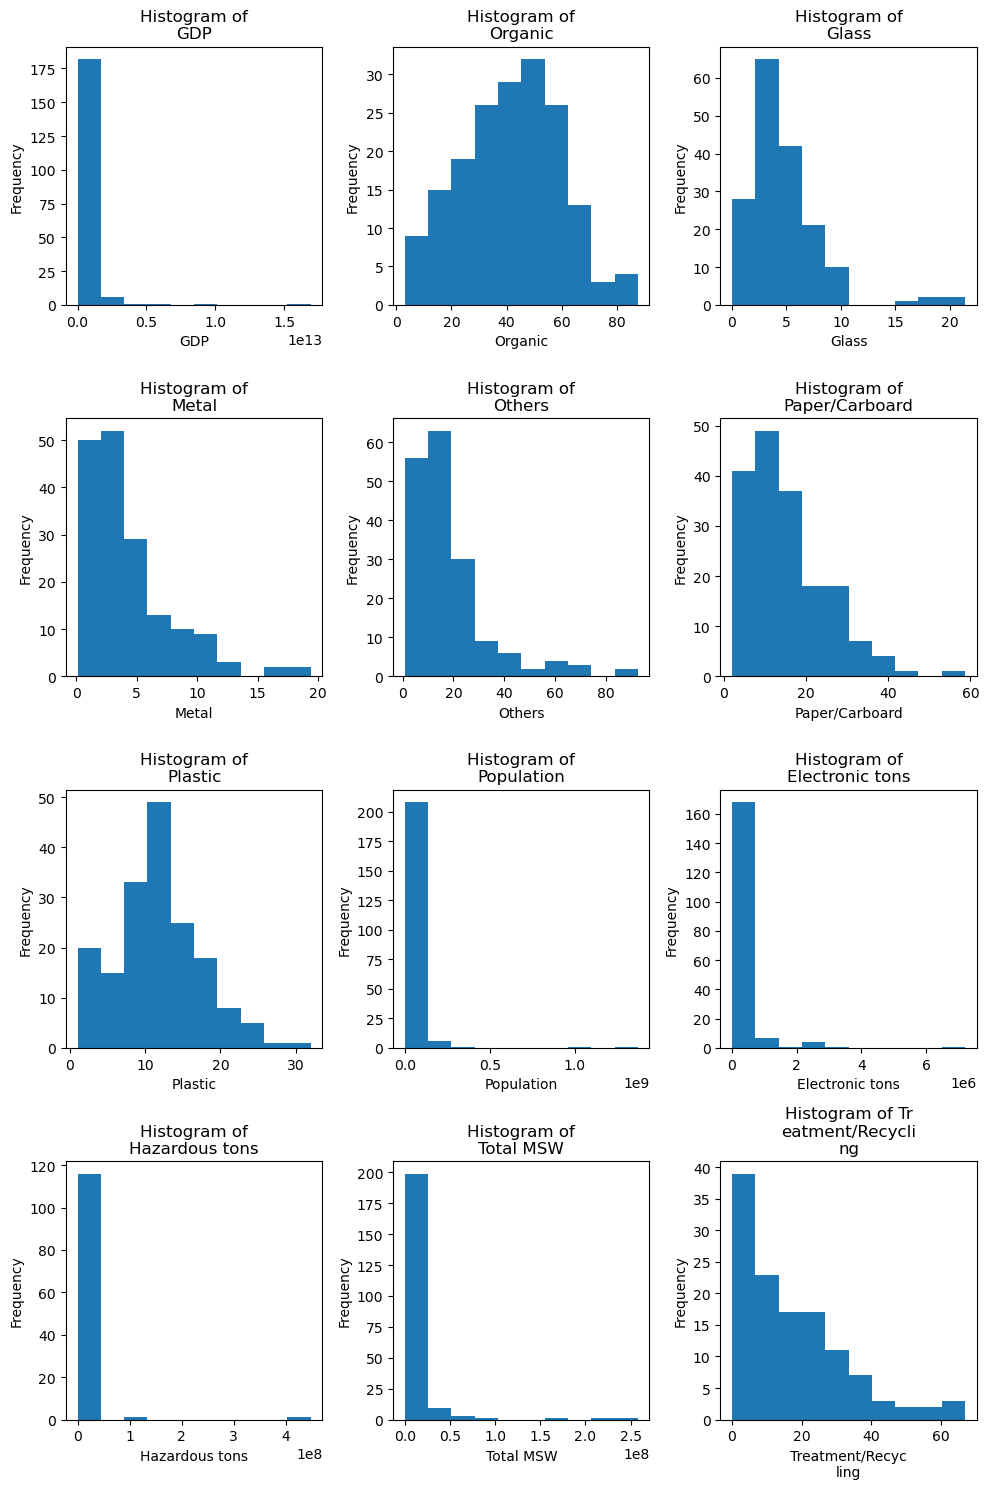

In [16]:
fig, axes = plt.subplots(nrows=(len(numeric_col)//3),ncols=3, figsize=(10,15))
axes = axes.flatten()
for i, column in enumerate(df_number):
    wrapped_title = "\n".join(textwrap.wrap(f'Histogram of {column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))
    axes[i].hist(df_number[column].dropna())
    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
df_number.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP,192.0,3.980093e+11,1.534521e+12,3.921616e+07,7.772412e+09,2.817728e+10,1.970804e+11,1.692033e+13
Organic,176.0,4.173439e+01,1.789823e+01,3.100000e+00,2.922500e+01,4.320000e+01,5.455000e+01,8.760000e+01
Glass,171.0,4.756173e+00,3.399614e+00,0.000000e+00,2.805000e+00,4.000000e+00,5.900000e+00,2.140000e+01
Metal,170.0,4.276838e+00,3.522976e+00,1.000000e-01,2.000000e+00,3.000000e+00,5.000000e+00,1.938000e+01
Others,175.0,1.841801e+01,1.601518e+01,8.000000e-01,9.000000e+00,1.400000e+01,2.235135e+01,9.270000e+01
Paper/Carboard,176.0,1.527736e+01,9.478098e+00,2.000000e+00,8.625000e+00,1.315500e+01,2.000000e+01,5.870000e+01
Plastic,175.0,1.168739e+01,5.585085e+00,1.000000e+00,7.950000e+00,1.150000e+01,1.455500e+01,3.200000e+01
Population,217.0,3.211832e+07,1.232717e+08,1.109700e+04,7.462210e+05,5.683483e+06,2.120300e+07,1.371220e+09
Electronic tons,182.0,2.422950e+05,7.255031e+05,1.000000e+01,5.750000e+03,2.250000e+04,1.492500e+05,7.211000e+06
Hazardous tons,118.0,6.934517e+06,4.248432e+07,4.920000e+00,1.659875e+04,2.120205e+05,1.524000e+06,4.480000e+08


In [18]:
# Missing Data Imputations
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_number), columns=df_number.columns)
df_imputed['GDP Per Capita'] = df_imputed['GDP'] / df_imputed['Population']
df_imputed['Unit Per Capita'] = df_imputed['Total MSW'] / df_imputed['GDP']

df_imputed.isnull().sum()

GDP                    0
Organic                0
Glass                  0
Metal                  0
Others                 0
Paper/Carboard         0
Plastic                0
Population             0
Electronic tons        0
Hazardous tons         0
Total MSW              0
Treatment/Recycling    0
GDP Per Capita         0
Unit Per Capita        0
dtype: int64

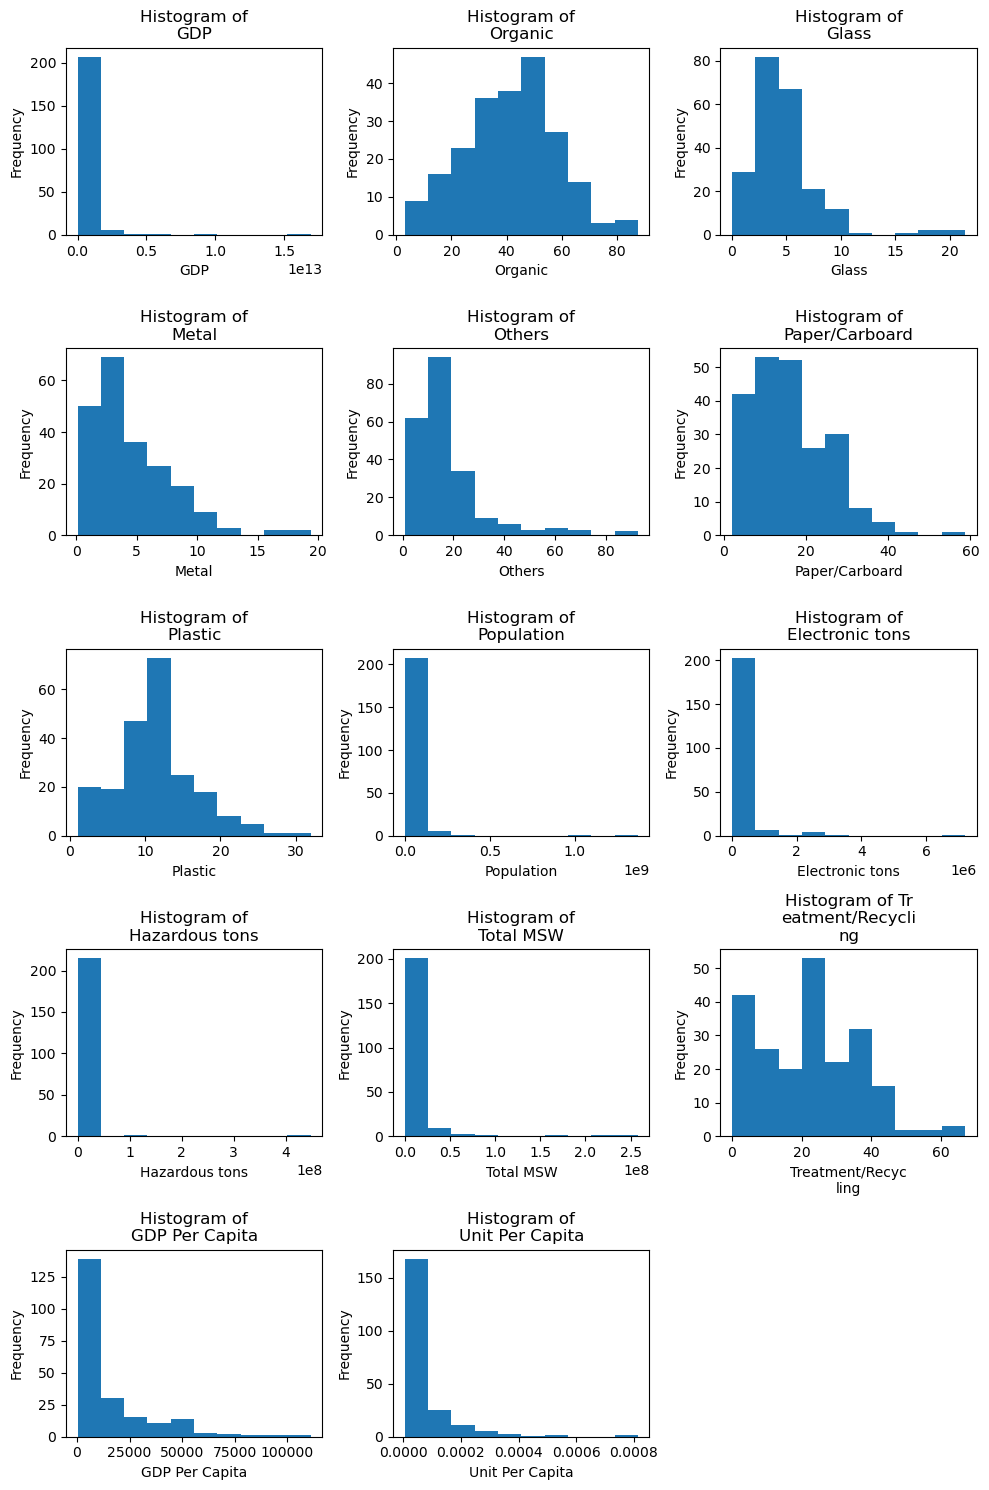

In [19]:
fig, axes = plt.subplots(nrows=5,ncols=3, figsize=(10,15))
axes = axes.flatten()
for i, column in enumerate(df_imputed.columns[:14]):
    wrapped_title = "\n".join(textwrap.wrap(f'Histogram of {column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))
    axes[i].hist(df_imputed[column].dropna())
    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel('Frequency')

# Remove the last two subplots
for i in range(14, len(axes)):
    fig.delaxes(axes[i])
# Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
plt.savefig('Histogram1_plot.png')
# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Log Transformation
df_log_transform = np.log(df_imputed.iloc[:,[0,3,4,7,8,9,10,12,13]])
df_untransformed = df_imputed.iloc[[1,2,5,6,11]]
df_log_transform.head()
df_transformed_number = pd.concat([df_log_transform, df_imputed.iloc[:,[1,2,5,6,11]]], axis=1)
df_transformed_number.head()

,GDP,Metal,Others,Population,Electronic tons,Hazardous tons,Total MSW,GDP Per Capita,Unit Per Capita,Organic,Glass,Paper/Carboard,Plastic,Treatment/Recycling
0,21.193311,1.722767,3.047692,11.544298,6.551080,6.921987,11.386591,9.649013,-9.806720,25.466667,5.900000,22.000000,11.300000,11.000000
1,23.787293,1.061257,2.567766,17.360982,9.903488,12.437678,15.543358,6.426310,-8.243935,49.746667,3.903333,16.436667,12.276667,25.530000
2,25.358406,1.481605,2.442347,17.038225,11.429544,12.437678,15.253838,8.320181,-10.104567,51.800000,6.700000,11.900000,13.500000,25.530000
3,23.323811,1.568616,2.721953,14.873545,9.903488,8.650818,13.949135,8.450266,-9.374676,51.400000,4.500000,9.900000,9.600000,35.200000
4,21.923195,0.955511,2.451005,11.319717,6.141636,7.488853,10.668955,10.603478,-11.254239,31.200000,8.200000,35.100000,11.300000,24.333333


In [21]:
df_transformed_number.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP,217.0,23.922089,2.464878,17.484599,22.050651,23.792246,25.845868,30.459537
Metal,217.0,1.262333,0.744241,-2.302585,0.746688,1.243194,1.817536,2.964242
Others,217.0,2.605667,0.758105,-0.223144,2.230014,2.617396,3.010621,4.529368
Population,217.0,15.134642,2.430223,9.314430,13.522777,15.553075,16.869653,21.038967
Electronic tons,217.0,9.596468,2.625242,2.302585,7.495542,9.615805,11.429544,15.791118
Hazardous tons,217.0,11.211045,2.795537,1.593309,9.911970,11.044856,12.601418,19.920304
Total MSW,217.0,13.931204,2.281659,8.291418,12.258923,14.375126,15.391768,19.368470
GDP Per Capita,217.0,8.787447,1.395438,5.803434,7.818314,8.814912,9.949441,11.616988
Unit Per Capita,217.0,-9.990885,0.969486,-12.283825,-10.623970,-10.023897,-9.479752,-7.112448
Organic,217.0,41.735959,16.676642,3.100000,30.000000,43.600000,52.390000,87.600000


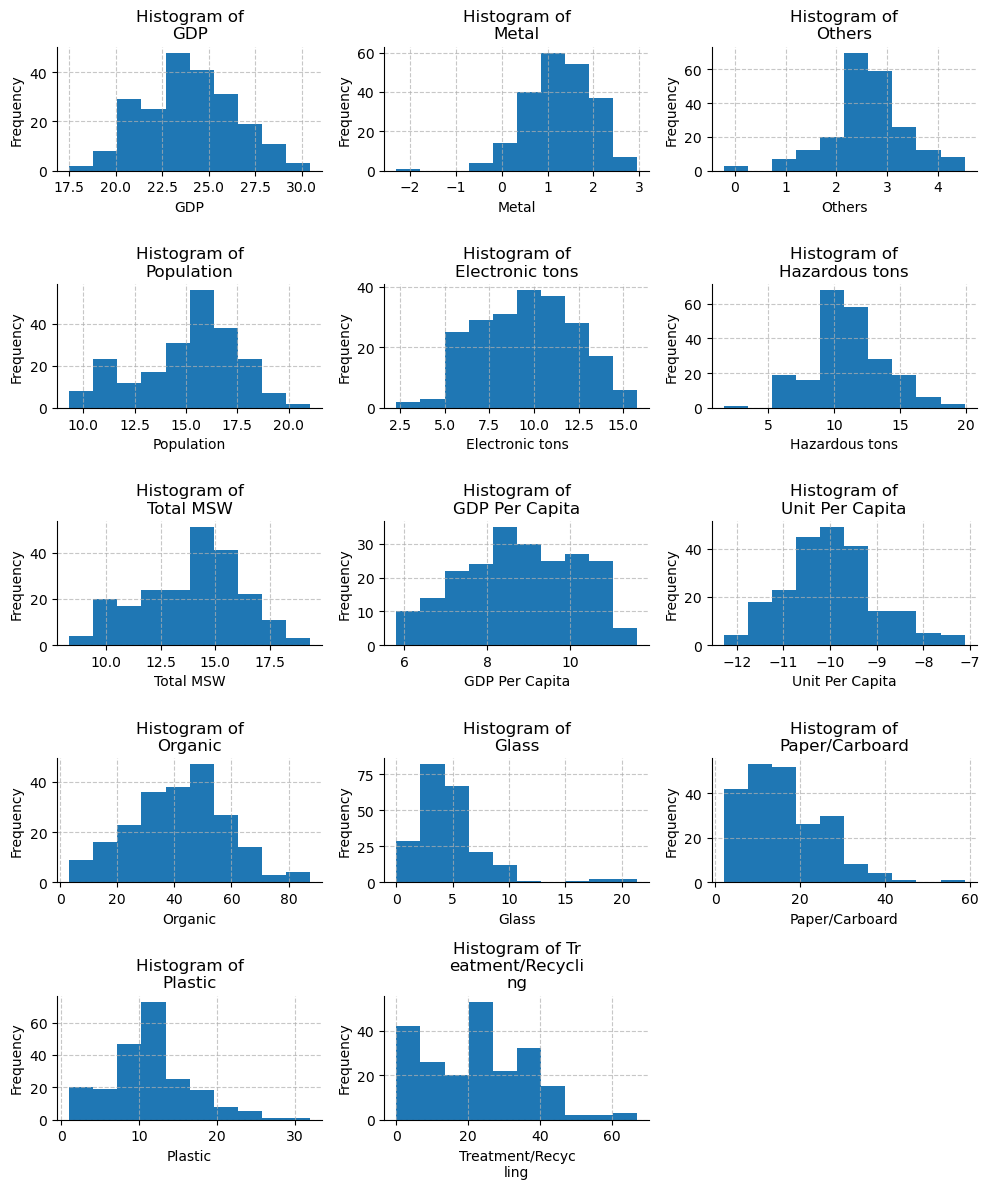

In [22]:
fig, axes = plt.subplots(nrows=5,ncols=3, figsize=(10,12))
axes = axes.flatten()
for i, column in enumerate(df_transformed_number[:14]):
    wrapped_title = "\n".join(textwrap.wrap(f'Histogram of {column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))
    axes[i].hist(df_transformed_number[column])
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel('Frequency')
for i in range(14, len(axes)):
    fig.delaxes(axes[i])

# Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
#plt.savefig('Histogram2_plot.png')
plt.tight_layout()
plt.show()

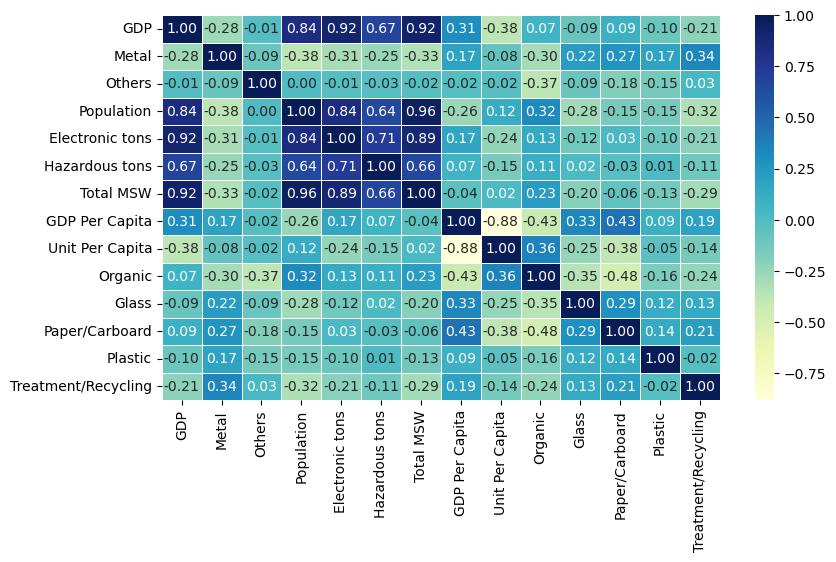

In [23]:
corr = df_transformed_number.corr()
fig, ax = plt.subplots(figsize=(9, 5))
 #plot the heatmap
ax = sns.heatmap(corr,linewidths=.7,annot=True,fmt=".2f", cmap = 'YlGnBu',cbar=True, ax=ax)
# Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
#plt.savefig('heatmap.png')
plt.show()

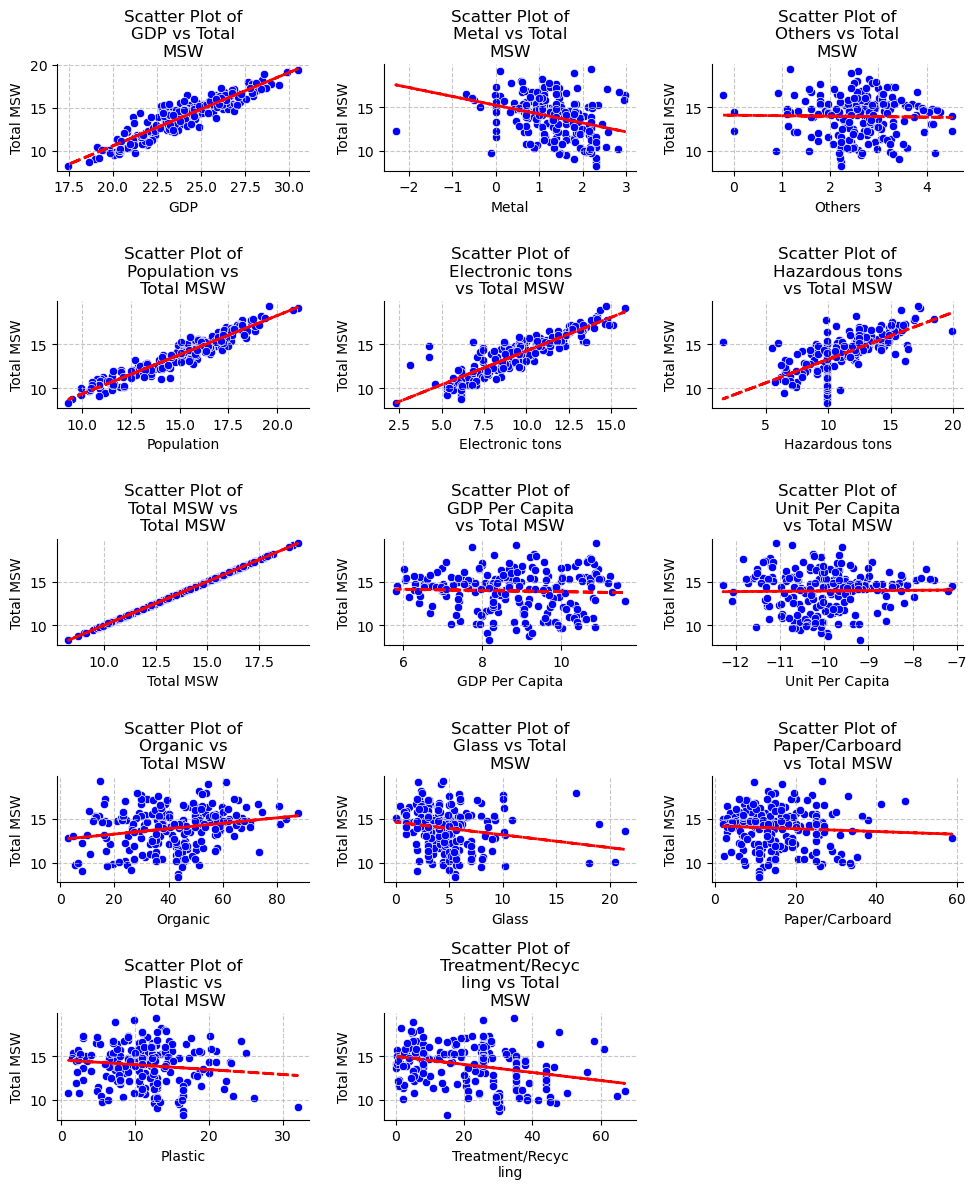

In [24]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 12))
axes = axes.flatten()

y_column = df_transformed_number.columns[6]

for i, column in enumerate(df_transformed_number[:14]):
    wrapped_title = "\n".join(textwrap.wrap(f'Scatter Plot of {column} vs {y_column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))

    # Plot scatter plot with seaborn
    sns.scatterplot(x=df_transformed_number[column], y=df_transformed_number[y_column], ax=axes[i], color='blue')

    # Fit a linear regression line
    z = np.polyfit(df_transformed_number[column], df_transformed_number[y_column], 1)
    p = np.poly1d(z)
    axes[i].plot(df_transformed_number[column], p(df_transformed_number[column]), color='red', linestyle='--', linewidth=2)

    axes[i].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

    # Remove box around the subplot
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['left'].set_visible(True)

    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel(y_column)
for i in range(14, len(axes)):
    fig.delaxes(axes[i])
    
# Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
#plt.savefig('scatter.png')
plt.tight_layout()
plt.show()


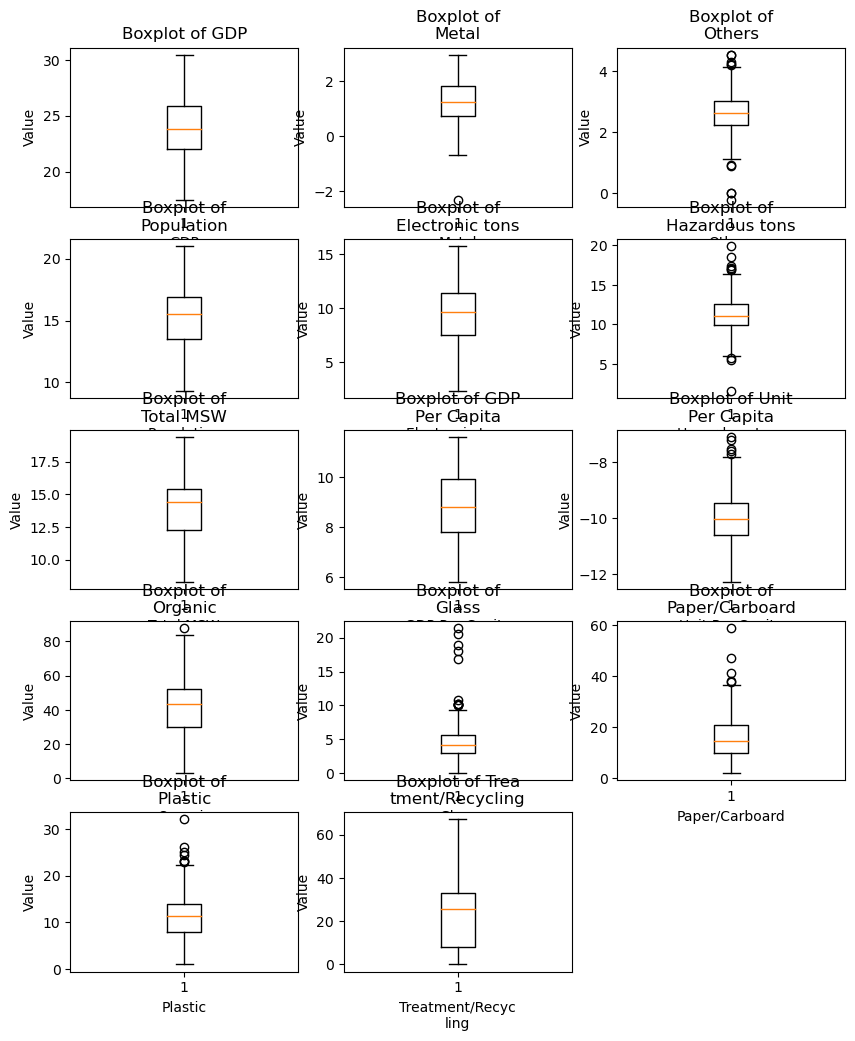

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 12))
axes = axes.flatten()

# Plot boxplots
for i, column in enumerate(df_transformed_number.columns[:14]):
    wrapped_title = "\n".join(textwrap.wrap(f'Boxplot of {column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))
    axes[i].boxplot(df_transformed_number[column].dropna())
    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel('Value')

# Remove the last two subplots
for i in range(14, len(axes)):
    fig.delaxes(axes[i])

    # Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
plt.savefig('boxplot.png')
# Adjust layout
#plt.tight_layout()
plt.show()

In [26]:
df_category.head()

,ISO,Region ID,Country,Income ID,Info System,Agency,Law,PPP
0,ABW,LCN,Aruba,HIC,NaN,Yes,Yes,Yes
1,AFG,SAS,Afghanistan,LIC,NaN,Yes,Yes,Yes
2,AGO,SSF,Angola,LMC,NaN,NaN,Yes,Yes
3,ALB,ECS,Albania,UMC,No,Yes,Yes,Yes
4,AND,ECS,Andorra,HIC,NaN,Yes,Yes,Yes


In [27]:
print(df_category['Info System'].unique())
print(df_category['Agency'].unique())
print(df_category['Law'].unique())
print(df_category['PPP'].unique())

[nan 'No' 'Yes' 'None']
['Yes' nan 'No' 'None']
['Yes' nan 'No' 'yes']
['Yes' 'No' nan 'None']


In [28]:
# Capitalize each category
df_category['Info System'] = df_category['Info System'].str.capitalize()
df_category['Agency'] = df_category['Agency'].str.capitalize()
df_category['Law'] = df_category['Law'].str.capitalize()
df_category['PPP'] = df_category['PPP'].str.capitalize()

# Combine None category with No cagetory
df_category['Info System'] = df_category['Info System'].replace('None', 'Yes')
df_category['Agency'] = df_category['Agency'].replace('None', 'Yes')
df_category['Law'] = df_category['Law'].replace('None', 'Yes')
df_category['PPP'] = df_category['Info System'].replace('None', 'Yes')

print(df_category['Info System'].unique())
print(df_category['Agency'].unique())
print(df_category['Law'].unique())
print(df_category['PPP'].unique())

[nan 'No' 'Yes']
['Yes' nan 'No']
['Yes' nan 'No']
[nan 'No' 'Yes']


In [29]:
print(df_category['Info System'].value_counts())
print(df_category['Agency'].value_counts())
print(df_category['Law'].value_counts())
print(df_category['PPP'].value_counts())

Yes    68
No     44
Name: Info System, dtype: int64
Yes    149
No      15
Name: Agency, dtype: int64
Yes    177
No      17
Name: Law, dtype: int64
Yes    68
No     44
Name: PPP, dtype: int64


In [30]:
df_category.isnull().sum()

ISO              0
Region ID        0
Country          1
Income ID        0
Info System    105
Agency          53
Law             23
PPP            105
dtype: int64

In [31]:
df_category.head()

,ISO,Region ID,Country,Income ID,Info System,Agency,Law,PPP
0,ABW,LCN,Aruba,HIC,NaN,Yes,Yes,NaN
1,AFG,SAS,Afghanistan,LIC,NaN,Yes,Yes,NaN
2,AGO,SSF,Angola,LMC,NaN,NaN,Yes,NaN
3,ALB,ECS,Albania,UMC,No,Yes,Yes,No
4,AND,ECS,Andorra,HIC,NaN,Yes,Yes,NaN


In [32]:
df_category
df_copy2 = df_category.copy()
df_cat_copy = df_category.copy()
df_copy2.head()

,ISO,Region ID,Country,Income ID,Info System,Agency,Law,PPP
0,ABW,LCN,Aruba,HIC,NaN,Yes,Yes,NaN
1,AFG,SAS,Afghanistan,LIC,NaN,Yes,Yes,NaN
2,AGO,SSF,Angola,LMC,NaN,NaN,Yes,NaN
3,ALB,ECS,Albania,UMC,No,Yes,Yes,No
4,AND,ECS,Andorra,HIC,NaN,Yes,Yes,NaN


In [33]:
# Impute missing values in categorical columns with the mode
for col in df_cat_copy.columns:
    mode_value = df_cat_copy[col].mode()[0]
    df_cat_copy[col].fillna(mode_value, inplace=True)
df_cat_copy.head()

,ISO,Region ID,Country,Income ID,Info System,Agency,Law,PPP
0,ABW,LCN,Aruba,HIC,Yes,Yes,Yes,Yes
1,AFG,SAS,Afghanistan,LIC,Yes,Yes,Yes,Yes
2,AGO,SSF,Angola,LMC,Yes,Yes,Yes,Yes
3,ALB,ECS,Albania,UMC,No,Yes,Yes,No
4,AND,ECS,Andorra,HIC,Yes,Yes,Yes,Yes


In [34]:
# Categorical Variables encoding
df_cat_copy['Info System'].replace({'Yes': 1, 'No': 0}, inplace=True)
df_cat_copy['Agency'].replace({'Yes': 1, 'No': 0}, inplace=True)
df_cat_copy['Law'].replace({'Yes': 1, 'No': 0}, inplace=True)
df_cat_copy['PPP'].replace({'Yes': 1, 'No': 0}, inplace=True)
df_cat_copy.head()

,ISO,Region ID,Country,Income ID,Info System,Agency,Law,PPP
0,ABW,LCN,Aruba,HIC,1,1,1,1
1,AFG,SAS,Afghanistan,LIC,1,1,1,1
2,AGO,SSF,Angola,LMC,1,1,1,1
3,ALB,ECS,Albania,UMC,0,1,1,0
4,AND,ECS,Andorra,HIC,1,1,1,1


In [35]:
categorical_columns1 = ['Info System', 'Agency', 'Law', 'PPP']
categorical_columns1

['Info System', 'Agency', 'Law', 'PPP']

In [36]:
df_category.head()

,ISO,Region ID,Country,Income ID,Info System,Agency,Law,PPP
0,ABW,LCN,Aruba,HIC,NaN,Yes,Yes,NaN
1,AFG,SAS,Afghanistan,LIC,NaN,Yes,Yes,NaN
2,AGO,SSF,Angola,LMC,NaN,NaN,Yes,NaN
3,ALB,ECS,Albania,UMC,No,Yes,Yes,No
4,AND,ECS,Andorra,HIC,NaN,Yes,Yes,NaN


In [37]:
demographic_col2 = ['ISO', 'Region ID', 'Country', 'Income ID']
df_demographic1 = df_cat_copy[categorical_columns1]
df_demographic2 = df_cat_copy[demographic_col2]
df_demographic1.head()

,Info System,Agency,Law,PPP
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,1,1,0
4,1,1,1,1


In [38]:
df_cat_transformed = pd.concat([df_demographic2, df_demographic1], axis=1)

df_transformed_all_numeric = pd.concat([df_transformed_number, df_demographic1], axis=1)
df_transformed_all_numeric.head()

,GDP,Metal,Others,Population,Electronic tons,Hazardous tons,Total MSW,GDP Per Capita,Unit Per Capita,Organic,Glass,Paper/Carboard,Plastic,Treatment/Recycling,Info System,Agency,Law,PPP
0,21.193311,1.722767,3.047692,11.544298,6.551080,6.921987,11.386591,9.649013,-9.806720,25.466667,5.900000,22.000000,11.300000,11.000000,1,1,1,1
1,23.787293,1.061257,2.567766,17.360982,9.903488,12.437678,15.543358,6.426310,-8.243935,49.746667,3.903333,16.436667,12.276667,25.530000,1,1,1,1
2,25.358406,1.481605,2.442347,17.038225,11.429544,12.437678,15.253838,8.320181,-10.104567,51.800000,6.700000,11.900000,13.500000,25.530000,1,1,1,1
3,23.323811,1.568616,2.721953,14.873545,9.903488,8.650818,13.949135,8.450266,-9.374676,51.400000,4.500000,9.900000,9.600000,35.200000,0,1,1,0
4,21.923195,0.955511,2.451005,11.319717,6.141636,7.488853,10.668955,10.603478,-11.254239,31.200000,8.200000,35.100000,11.300000,24.333333,1,1,1,1


In [ ]:
# Cleaned Data
df_transformed_all_numeric.to_csv('Waste.csv', index=False)